### Linear Regression Model on CalCOFI Kaggle dat to predict Temperature using Sanity of the water

### Data is collected from 1949 to 2017 and contains more than 150,000 samples

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing data from csv file

In [0]:
dataset = pd.read_csv('bottle.csv')
Data=dataset[['Salnty', 'T_degC']]

## Plotting the data salnty vs T_degC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


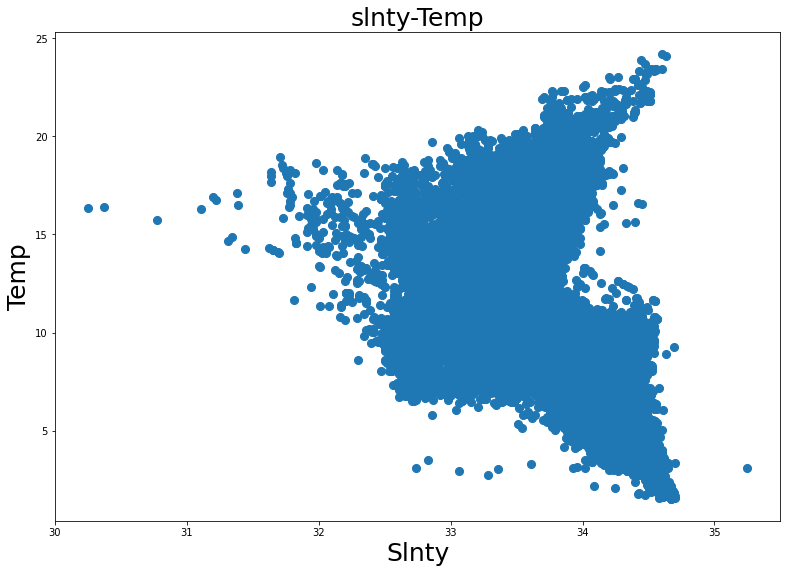

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(13, 9))
plt.scatter(Data["Salnty"], Data["T_degC"],s=65)
plt.xlabel('Slnty',fontsize=25)
plt.ylabel('Temp',fontsize=25)
plt.title('slnty-Temp',fontsize=25)
plt.show()

### Here I'm taking all the values to build the models. On the internet you may see models that used around 500 data points and gets high r2 score. But I'll show why linear regression is not suited for this data. So we will take all samples and split them in to train and tests.

In [4]:
Data.columns = ['Sal', 'Temp']
print(Data.head(10))

      Sal   Temp
0  33.440  10.50
1  33.440  10.46
2  33.437  10.46
3  33.420  10.45
4  33.421  10.45
5  33.431  10.45
6  33.440  10.45
7  33.424  10.24
8  33.420  10.06
9  33.494   9.86


### Filling NAN/missing values

In [5]:
Data.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## creating X and Y variable

In [0]:
X = pd.DataFrame(np.c_[Data['Sal']], columns = ['Sal'])
Y = Data['Temp']

## Splitting data in to test and train sets

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30604, 1)
(7652, 1)
(30604,)
(7652,)


## Training Linear regression model with training data

In [9]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting for test sets

In [0]:
y_pred = regressor.predict(X_test)

## Calculating R2 score using r2_score methode from sklearn library

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(r2)

0.39813419367690983


## Plotting data and Linear regression line to undersatand the reason for low r2 score. I have also trained model with 500 data samples where my r2 score was 0.84 due to less data.

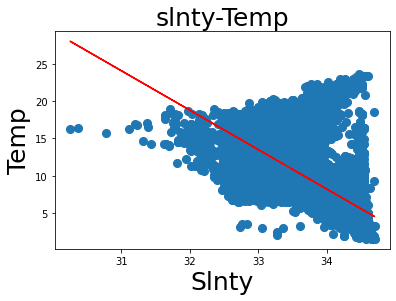

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.scatter(X_train, Y_train,s=65)
plt.plot(X_train,regressor.predict(X_train), color = 'red')
plt.xlabel('Slnty',fontsize=25)
plt.ylabel('Temp',fontsize=25)
plt.title('slnty-Temp',fontsize=25)
plt.show()

## Evaluating Model

In [15]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 3.5
R2 Score for Test set: 0.4
